<a href="https://colab.research.google.com/github/Anuskadas564/CODESOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score, r2_score,rand_score,confusion_matrix
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [ ]:
df=pd.read_csv('/content/fraudTest.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
def segment_by_amount(row):
  if row ['amt']>100:
    return 'HIGH VALUE'
  elif row ['amt']>50:
    return 'MEDIUM VALUE'
  else :
    return 'LOW VALUE'
df ['AmountSegment']=df.apply(segment_by_amount,axis=1)
print(df.head())



   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      long city_pop  \
0   Elliott      M            351 Darlene Green  ...  -80.9355   333497   
1  Williams      F             3638 Marsh Union  ... -110.4360

/tmp/ipython-input-7-3734817068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AmountSegment',data=df,palette='viridis')


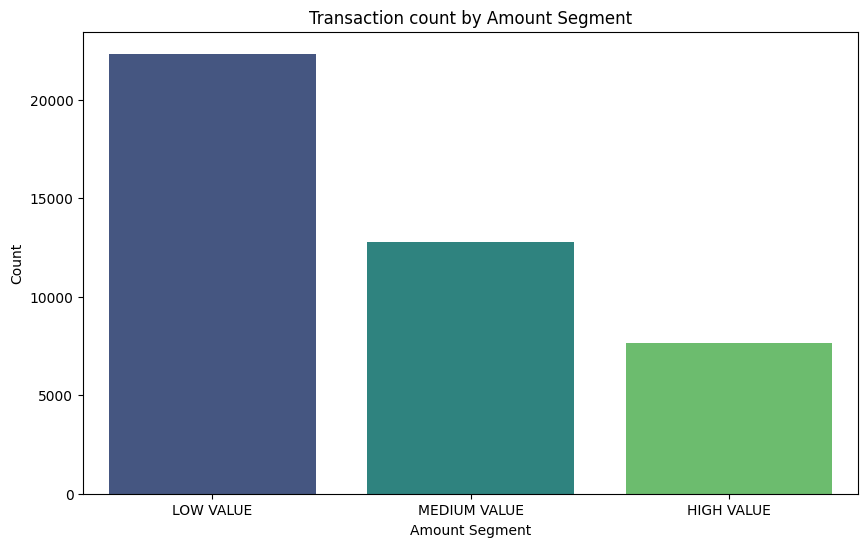

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='AmountSegment',data=df,palette='viridis')
plt.title('Transaction count by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.show()

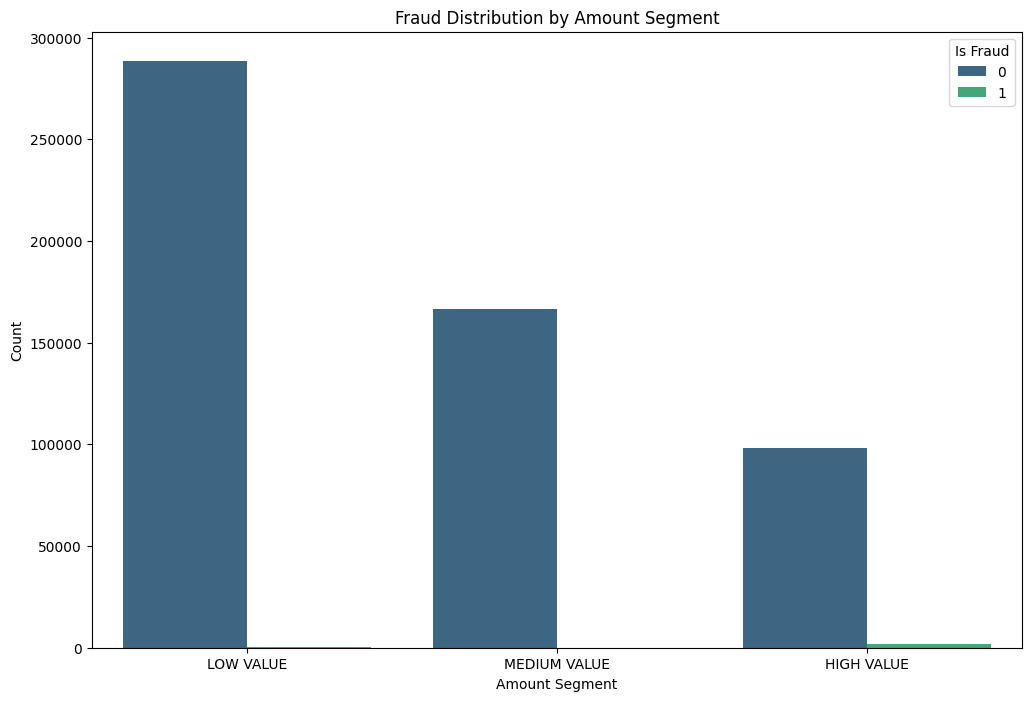

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='AmountSegment',hue='is_fraud',data=df,palette='viridis')
plt.title('Fraud Distribution by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.legend(title='Is Fraud',loc='upper right')
plt.show()

<ipython-input-36-a630dcee41c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category',data=df,palette='viridis',order=df['category'].value_counts().index)


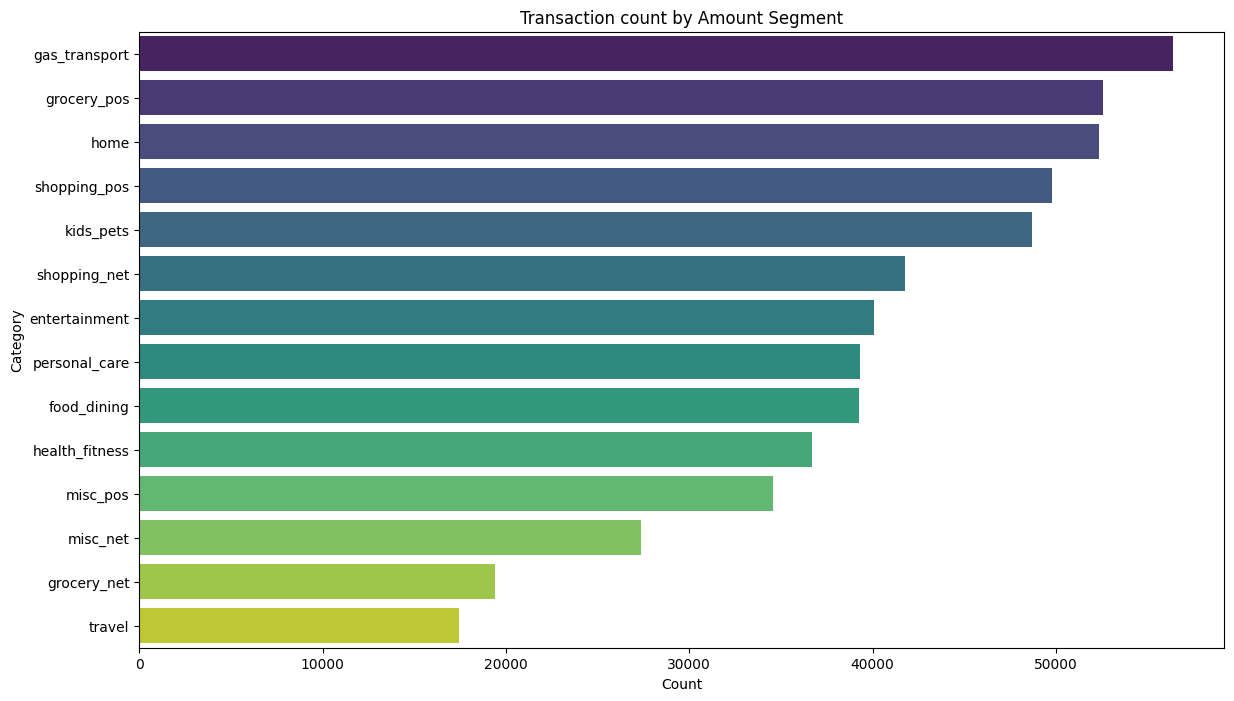

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y='category',data=df,palette='viridis',order=df['category'].value_counts().index)
plt.title('Transaction count by Amount Segment')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [ ]:
df=pd.read_csv('/content/fraudTest.csv')
df=df.head(2000).copy()
print(df.head())
print(df.info())
print(df.describe())
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
label_encoder={}
for column in df.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoder[column]=le
df=df.drop(columns=['Unnamed: 0','trans_date_trans_time','first','last','street','city','state','job','dob','cc_num'],axis=1)
X=df.drop(columns=['is_fraud'])
y=df['is_fraud']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

<ipython-input-37-c6a2382ebc25>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-37-c6a2382ebc25>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
# Define models
log_reg = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
gb_clf = GradientBoostingClassifier(random_state=42)

# Initial training (optional before SMOTE)
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Re-train on balanced data
log_reg.fit(X_train_resampled, y_train_resampled)
rf_clf.fit(X_train_resampled, y_train_resampled)
gb_clf.fit(X_train_resampled, y_train_resampled)

models = [log_reg, rf_clf, gb_clf]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Cross-validation scores (on original imbalanced training set)
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name}, ROC_AUC: {scores.mean():.2f} ± {scores.std():.2f}")

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    return accuracy, precision, recall, f1, roc_auc

# Evaluate all models on test set
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")


Logistic Regression, ROC_AUC: 0.99 ± 0.02
Random Forest, ROC_AUC: 0.95 ± 0.10
Gradient Boosting, ROC_AUC: 0.85 ± 0.20

Logistic Regression:
  Accuracy:  0.9750
  Precision: 0.1000
  Recall:    0.5000
  F1-Score:  0.1667
  ROC-AUC:   0.9585

Random Forest:
  Accuracy:  0.9950
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  ROC-AUC:   0.9366

Gradient Boosting:
  Accuracy:  0.9950
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  ROC-AUC:   0.9711


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf= {
    'n_estimators': [100,200],
    'max_depth' : [10,20,None],
    'min_samples_split': [2,5,10]
}
grid_rf=GridSearchCV(rf_clf,param_grid_rf,cv=5,scoring='roc_auc')
grid_rf.fit(X_train,y_train)
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

param_grid_gb={
    'n_estimators': [100,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,5,7]
}

grid_gb=GridSearchCV(gb_clf,param_grid_gb,cv=5, scoring='roc_auc')
grid_gb.fit(X_train,y_train)
print(f"Best parameters for Gradient Boosting: {grid_gb.best_params_}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

for model, name in zip([log_reg, best_rf, best_gb], ['Logistic Regression', 'Tuned Random Forest', 'Tuned Gradient Boosting']):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-Score: {f1:.2f}")
    print(f"  ROC-AUC: {roc_auc:.2f}")


Logistic Regression:
  Accuracy: 0.97
  Precision: 0.10
  Recall: 0.50
  F1-Score: 0.17
  ROC-AUC: 0.96

Tuned Random Forest:
  Accuracy: 0.99
  Precision: 0.00
  Recall: 0.00
  F1-Score: 0.00
  ROC-AUC: 0.68

Tuned Gradient Boosting:
  Accuracy: 0.99
  Precision: 0.00
  Recall: 0.00
  F1-Score: 0.00
  ROC-AUC: 0.48


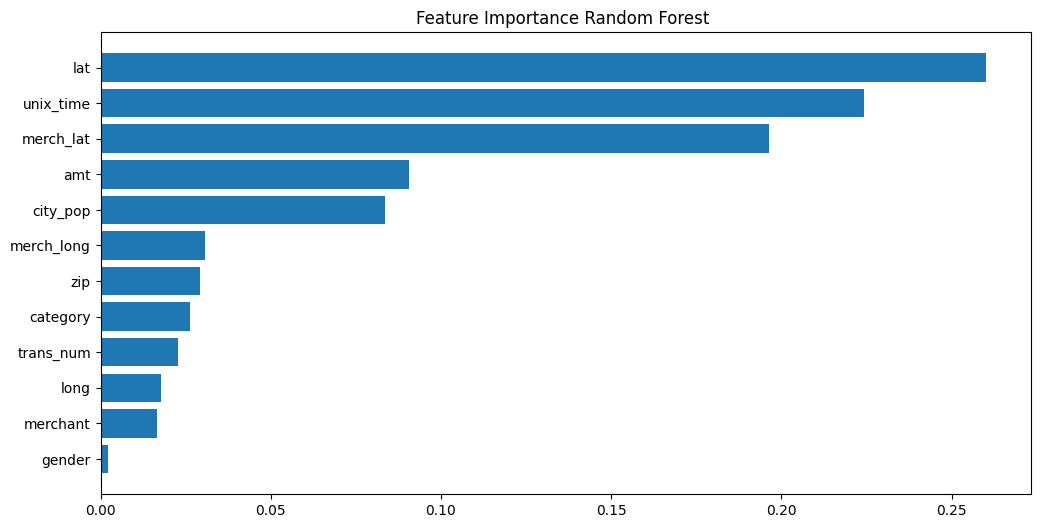

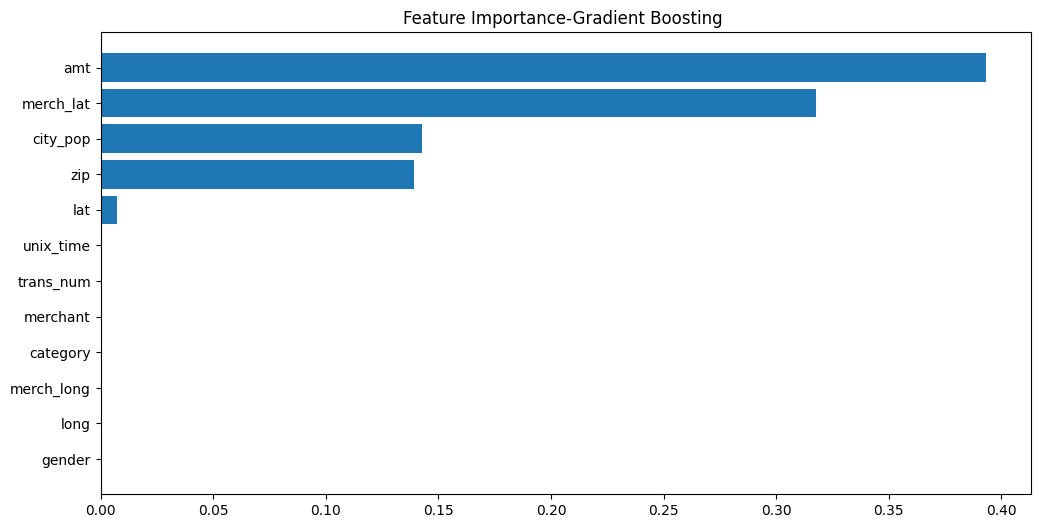

In [ ]:
feature_importance_rf =best_rf.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf )
plt.figure(figsize=(12,6 ) )
plt.barh (range(len(sorted_idx_rf)), feature_importance_rf[sorted_idx_rf] , align='center' )
plt.yticks ( range ( len ( sorted_idx_rf ) ) , X.columns [ sorted_idx_rf ] )
plt.title('Feature Importance Random Forest ' )
plt.show()

feature_importance_gb = best_gb.feature_importances_
sorted_idx_gb = np.argsort ( feature_importance_gb )
plt.figure(figsize=(12,6 ))
plt.barh ( range ( len ( sorted_idx_gb ) ) , feature_importance_gb [ sorted_idx_gb ] , align='center' )
plt.yticks ( range ( len ( sorted_idx_gb ) ) , X.columns [ sorted_idx_gb ] )
plt.title('Feature Importance-Gradient Boosting ')
plt.show()

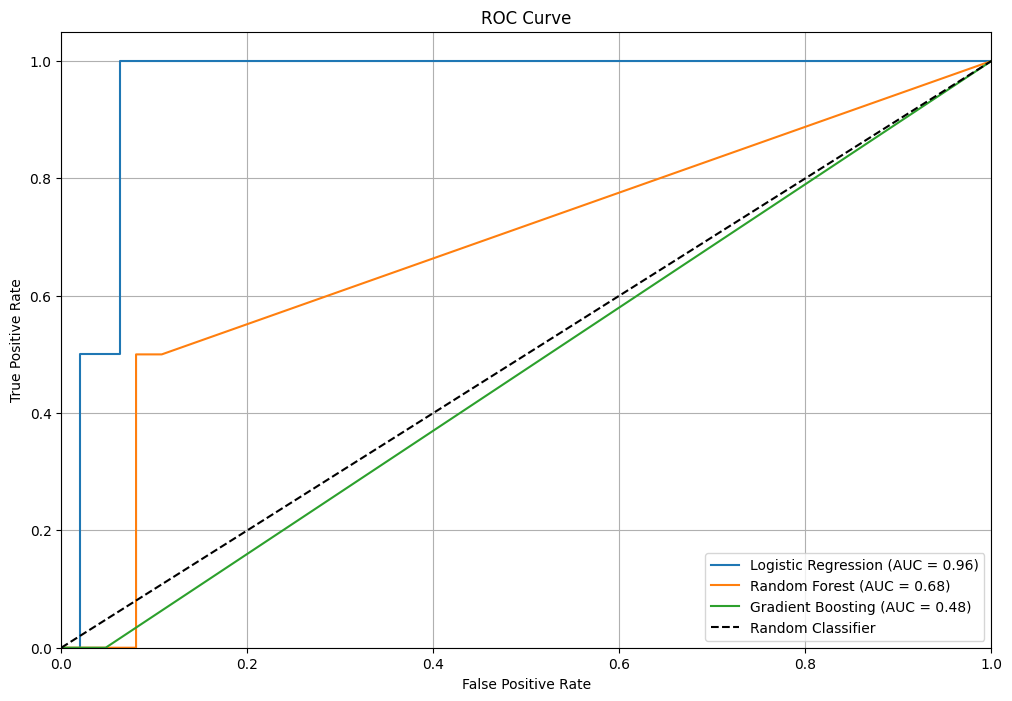

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for model, name in zip([log_reg, best_rf, best_gb], ['Logistic Regression', 'Random Forest', 'Gradient Boosting']):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()